# Análisis Simulaciones MadGraph/Pythia8/Delphes
Los outputs están en *sim_outputs/*.

In [1]:
import awkward as ak
import pandas as pd
import numpy as np
import vector
from coffea.nanoevents import NanoEventsFactory
from coffea.nanoevents import NanoAODSchema, DelphesSchema
import mplhep as hep
import matplotlib.pyplot as plt
import seaborn as sns
import DM_HEP_AN as dm
from math import pi
from funcs import *
hep.style.use("CMS")
#%matplotlib inline
plt.ioff()

## Simulación con $g_{Sg} = 1.0$ únicamente
Masas: $m_{\chi} = 10$ GeV, $m_{Y_{0}} = 100$ GeV ($m_{Y_{0}} = 2$ TeV)

## Simulación con $g_{Sg2} = 1.0$ únicamente
Masas: $m_{\chi} = 10$ GeV, $m_{Y_{0}} = 100$ GeV ($m_{Y_{0}} = 2$ TeV), proceso p p > y0 y0 j j, y0 > xd xd~, y0 > xd xd~

## Simulación con $g_{Sg1} = 1.0$ y $g_{Sg2} = 1.0$ únicamente
Masas: $m_{\chi} = 10$ GeV, $m_{Y_{0}} = 100$ GeV ($m_{Y_{0}} = 2$ TeV)

## Simulación con $g_{Sq} = 1.0$ únicamente
$q = u,d,c,s,b,t$



Masas: $m_{\chi} = 10$ GeV, $m_{Y_{0}} = 100$ GeV ($m_{Y_{0}} = 2$ TeV)

In [2]:
cases = ["gSq_only","gSg1_only", "gSg2_only_y0y0", "gSg_only"]
csvDir = "sim_outputs/csv/"
nFiles = 3
dataSignal = {}
for i in cases:
    dataSignal[i] = []
    for j in range(1,3):
        csvFiles = [csvDir+f"DM_{i}_{j}_{k}.csv" for k in range(1, nFiles+1)]
        dfs = [pd.read_csv(csvFile) for csvFile in csvFiles]
        data = pd.concat(dfs)
        dataSignal[i].append(data)
        data.to_csv(csvDir+f"DM_{i}_{j}.csv")

In [3]:
dataSignal[cases[0]][0]

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,jet_btag0,jet_btag1,jet_btag2,jet_btag3,jet_tautag0,jet_tautag1,jet_tautag2,jet_tautag3,missinget_met,missinget_phi
0,587.766200,385.951300,131.040330,122.932600,0.296047,-0.272385,0.834014,-1.863163,0.094789,3.069810,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19.287659,2.191181
1,581.544100,436.219360,83.219740,77.175460,-0.194645,-0.263525,1.984020,1.721943,0.981479,-2.292222,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.908746,-1.010366
2,512.648100,478.751300,92.114470,77.946396,0.681759,0.929280,0.428407,-2.692056,-1.842054,1.345399,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,27.675697,1.788336
3,513.049440,461.673300,32.523200,20.744324,-0.403126,0.052357,1.536719,-2.375048,1.191354,-1.936878,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,17.423433,1.731998
4,524.097800,470.951320,38.144970,26.992750,-0.334820,-1.132830,2.517650,1.666349,-0.315133,2.981305,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15.168061,1.078169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,23.579672,22.892849,14.048151,10.902916,0.948473,-3.529121,-3.446970,0.549188,0.109583,-1.050493,...,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,28.944323,2.914356
49996,118.075110,85.142210,74.986290,56.045815,1.564190,2.035534,-0.418788,-1.291623,-0.981472,-3.114824,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.332588,0.605127
49997,60.582943,51.392960,43.022310,33.027440,1.421868,2.014953,-0.413210,-0.265154,-2.450797,0.426879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.398880,0.464476
49998,50.043450,33.447296,31.038979,26.506638,-1.090144,-2.630286,-0.280571,0.080668,-3.009375,-0.401694,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.748883,0.823925


In [4]:
# Análisis con csv file
data_gSg1 = dataSignal['gSg1_only']

In [10]:
folder = 'Plots/gSg1/mx10_my_100_'
makePlots(data_gSg1[0],folder=folder)
folder = 'Plots/gSg1/mx10_my_2000_'
makePlots(data_gSg1[1],folder=folder)

In [5]:
# Análisis con csv file
data_gSg2 = dataSignal['gSg2_only_y0y0']

In [12]:
folder = 'Plots/gSg2_y0y0/mx10_my_100_'
makePlots(data_gSg2[0],folder=folder)
folder = 'Plots/gSg2_y0y0/mx10_my_2000_'
makePlots(data_gSg2[1],folder=folder)

In [6]:
data_gSg = dataSignal['gSg_only']

In [14]:
folder = 'Plots/gSg/mx10_my_100_'
makePlots(data_gSg[0],folder=folder)
folder = 'Plots/gSg/mx10_my_2000_'
makePlots(data_gSg[1],folder=folder)

In [7]:
data_gSq = dataSignal['gSq_only']

In [16]:
folder = 'Plots/gSq/mx10_my_100_'
makePlots(data_gSq[0], folder=folder)
folder = 'Plots/gSq/mx10_my_2000_'
makePlots(data_gSq[1], folder=folder)

Background

In [8]:
csvFile = "./background/ZpJets.csv"
data_ZpJ = pd.read_csv(csvFile)
csvFile = "./background/WpJets.csv"
data_WpJ = pd.read_csv(csvFile)

In [9]:
data_gSg1[0]

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,jet_btag0,jet_btag1,jet_btag2,jet_btag3,jet_tautag0,jet_tautag1,jet_tautag2,jet_tautag3,missinget_met,missinget_phi
0,240.998900,114.498390,87.032740,53.953247,0.941289,-2.928320,0.283154,-0.158920,-1.860497,1.061186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.309747,-2.326780
1,620.464200,393.470950,226.895020,163.963640,0.350848,0.027495,-0.322867,-2.213653,-1.008741,1.685402,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.362581,-2.242071
2,550.368100,329.564450,228.870640,17.185095,-1.308166,-0.101204,-2.644965,-1.343592,-3.093594,0.332764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.538626,0.835823
3,396.926120,269.078950,177.949370,147.682700,-1.037883,1.155310,0.481151,-0.949630,-0.654509,-2.797458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.183586,3.084845
4,379.976650,324.219180,105.799520,41.908695,-1.717872,0.110780,-2.016541,-1.098038,-2.065992,1.315231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.868352,-1.125924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,66.930080,37.742190,24.234144,22.909737,1.500816,0.752730,2.315977,1.025584,-1.547559,0.923965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.202029,2.359341
49996,184.704670,165.188810,47.738865,16.634617,-2.383282,-1.158030,-0.189419,-1.035217,-2.160168,1.213225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.182301,-2.070455
49997,140.782260,72.051440,67.325935,47.323082,-0.802663,-3.871148,-1.364176,-1.387840,-3.112069,0.006409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.711193,-0.417670
49998,67.746826,38.706226,35.766724,21.230927,-1.097308,-1.907404,-0.426764,-3.586219,3.105717,0.520626,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.636670,1.079699


In [10]:
folder = 'Plots/gSg1/'
datas = [data_ZpJ, data_WpJ, data_gSg1[0], data_gSg1[1]]
names = ['Z+Jets','W+Jets','gSg1 MY0=100GeV', 'gSg1 MY0=2TeV']
plotObservable(datas, names, 'Azim_diff', folder=folder)
plotObservable(datas, names, 'Inv_mass', folder=folder)
plotObservable(datas, names, 'Pseudorapidity', folder=folder)

In [11]:
folder = 'Plots/gSg2_y0y0/'
datas = [data_ZpJ, data_WpJ, data_gSg2[0], data_gSg2[1]]
names = ['Z+Jets','W+Jets','gSg2 MY0=100GeV', 'gSg2 MY0=2TeV']
plotObservable(datas, names, 'Azim_diff', folder=folder)
plotObservable(datas, names, 'Inv_mass', folder=folder)
plotObservable(datas, names, 'Pseudorapidity', folder=folder)

In [12]:
folder = 'Plots/gSg/'
datas = [data_ZpJ, data_WpJ, data_gSg[0], data_gSg[1]]
names = ['Z+Jets','W+Jets','gSg MY0=100GeV', 'gSg MY0=2TeV']
plotObservable(datas, names, 'Azim_diff', folder=folder)
plotObservable(datas, names, 'Inv_mass', folder=folder)
plotObservable(datas, names, 'Pseudorapidity', folder=folder)

In [13]:
folder = 'Plots/gSq/'
datas = [data_ZpJ, data_WpJ, data_gSq[0], data_gSq[1]]
names = ['Z+Jets','W+Jets','gSq MY0=100GeV', 'gSq MY0=2TeV']
plotObservable(datas, names, 'Azim_diff', folder=folder)
plotObservable(datas, names, 'Inv_mass', folder=folder)
plotObservable(datas, names, 'Pseudorapidity', folder=folder)

In [14]:
folder = 'Plots/'
datas = [data_ZpJ, data_WpJ, data_gSq[0], data_gSg1[0], data_gSg2[0], data_gSg[0]]
names = ['Z+Jets','W+Jets','Case 1', 'Case 2', 'Case 3', 'Case 4']
plotObservable(datas, names, 'Azim_diff', folder=folder)
plotObservable(datas, names, 'Inv_mass', folder=folder)
plotObservable(datas, names, 'Pseudorapidity', folder=folder)

In [15]:
CSs = {}
for i in cases:
    CSs[i] = []
    CSs[f"error{i}"] = []

In [51]:
htmlDir = "sim_outputs/html/"
nFiles = 3
CSs = {}
for i in cases:
    for j in range(1,3):
        CSs[f"{i}_{j}"] = []
        CSs[f"error{i}_{j}"] = []
        htmlFiles = [htmlDir+f"DM_{i}_{j}_{k}.html" for k in range(1, nFiles+1)]
        for k in range(1, nFiles+1):
            with open(htmlDir+f"DM_{i}_{j}_{k}.html", 'r') as htmlFile:
                htmlText = htmlFile.read()
            indexS = htmlText.find("<b>s= ")
            indexPM = htmlText.find(" &#177 ")
            indexPB = htmlText.find(" (pb)")
            CSs[f"{i}_{j}"].append(float(htmlText[indexS+6:indexPM]))
            CSs[f"error{i}_{j}"].append(float(htmlText[indexPM+7:indexPB]))

In [52]:
CSs["run"] = range(1,4)

In [53]:
CSs=pd.DataFrame(CSs)

In [54]:
CSs

,gSq_only_1,errorgSq_only_1,gSq_only_2,errorgSq_only_2,gSg1_only_1,errorgSg1_only_1,gSg1_only_2,errorgSg1_only_2,gSg2_only_y0y0_1,errorgSg2_only_y0y0_1,gSg2_only_y0y0_2,errorgSg2_only_y0y0_2,gSg_only_1,errorgSg_only_1,gSg_only_2,errorgSg_only_2,run
0,0.000884,0.000002,0.000037,6.840000e-08,41.303,0.0573,6.9563,0.00949,0.002105,0.000003,0.000163,2.630000e-07,41.213,0.0650,6.9680,0.0104,1
1,0.000884,0.000002,0.000037,6.680000e-08,41.158,0.0624,6.9652,0.01150,0.002104,0.000003,0.000163,2.720000e-07,41.204,0.0638,6.9753,0.0120,2
2,0.171030,0.000293,0.000037,6.270000e-08,209.930,0.2580,6.9529,0.01140,0.000814,0.000001,0.000163,2.670000e-07,210.120,0.2540,6.9647,0.0117,3


In [69]:
CSs["errorgSq_only_1"]/CSs["gSq_only_1"].std()

0    0.000016
1    0.000016
2    0.002983
Name: errorgSq_only_1, dtype: float64

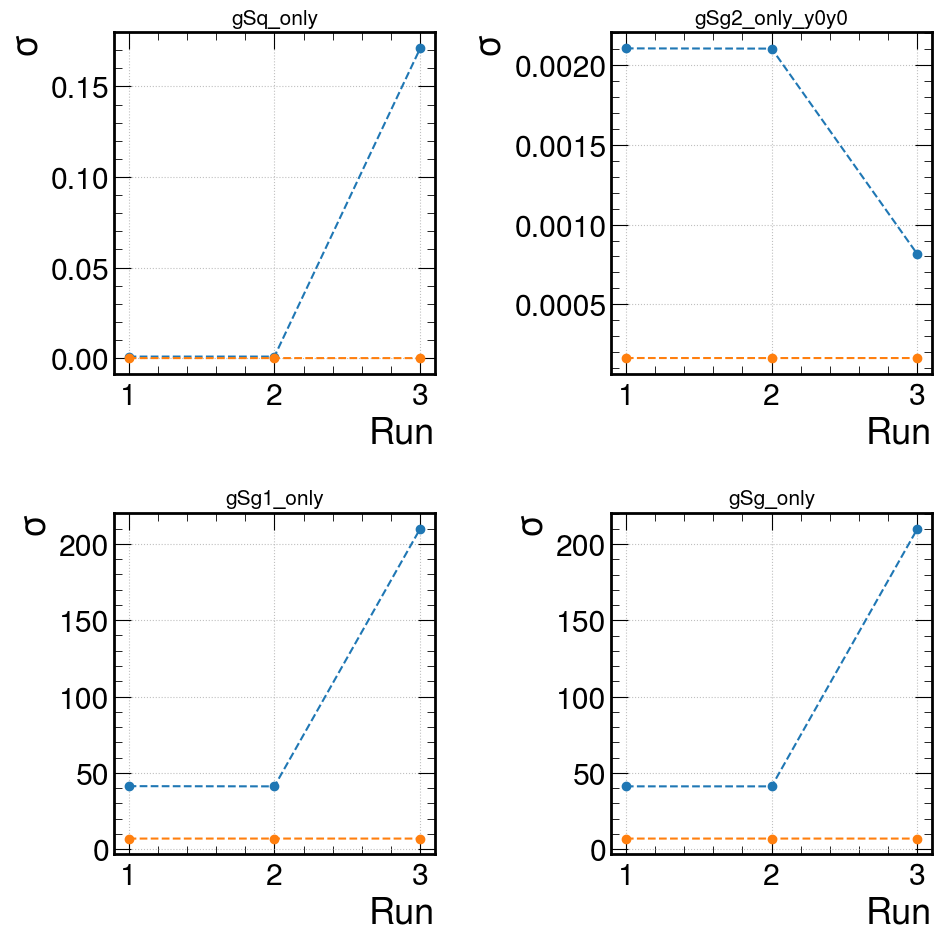

In [75]:
fig, ax = plt.subplots(2,2)
for i in range(2):
    ax[0,0].errorbar(CSs["run"], CSs[f"{cases[0]}_{i+1}"], yerr=CSs[f"error{cases[0]}_{i+1}"], marker='o', linestyle='--', ecolor='black', capsize=3)
    ax[1,0].errorbar(CSs["run"], CSs[f"{cases[1]}_{i+1}"], yerr=CSs[f"error{cases[1]}_{i+1}"], marker='o', linestyle='--', ecolor='black', capsize=3)
    ax[0,1].errorbar(CSs["run"], CSs[f"{cases[2]}_{i+1}"], yerr=CSs[f"error{cases[2]}_{i+1}"], marker='o', linestyle='--', ecolor='black', capsize=3)
    ax[1,1].errorbar(CSs["run"], CSs[f"{cases[3]}_{i+1}"], yerr=CSs[f"error{cases[3]}_{i+1}"], marker='o', linestyle='--', ecolor='black', capsize=3)
ax[0,0].set_title(cases[0], fontsize=15)
ax[1,0].set_title(cases[1], fontsize=15)
ax[0,1].set_title(cases[2], fontsize=15)
ax[1,1].set_title(cases[3], fontsize=15)
for i in range(2):
    for j in range(2):
        ax[i,j].set_ylabel(r'$\sigma$')
        ax[i,j].set_xlabel('Run')
        ax[i,j].grid()
fig.tight_layout()
plt.show()